In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

%matplotlib inline

In [11]:
extreme_points = {
    "0": [46.55, 16.3667],
    "90": [45.383, 19.45],
    "180": [42.4, 18.533],
    "270": [45.483, 13.5]
}

In [12]:
geodata = pd.read_csv("data.csv")

In [13]:
geodata.describe()

,latitude,longitude
count,16000.000000,16000.000000
mean,45.125808,16.402046
std,0.856409,1.274023
min,42.449059,13.511597
25%,44.779901,15.619914
50%,45.351980,16.309611
75%,45.703732,17.212765
max,46.530302,19.422503


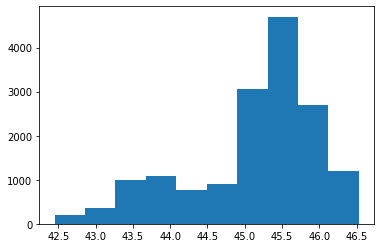

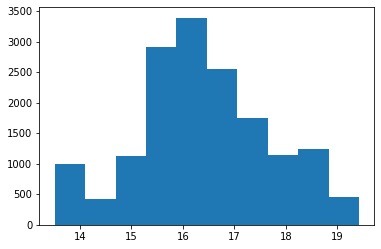

In [14]:
plt.hist(geodata["latitude"])
plt.show()
plt.hist(geodata["longitude"])
plt.show()

In [37]:
croatia_map = gpd.read_file("croatia\CROATIA_HR_Općine_ADMIN2.shp")

In [38]:
crs = {'init':'epsg:4326'}

geometry = [Point(xy) for xy in zip(geodata['longitude'], geodata['latitude'])]

geo_croatia = gpd.GeoDataFrame(geodata, crs=crs, geometry=geometry)

geo_croatia.head()

C:\Users\Dario\AppData\Local\Programs\Python\Python39\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,uuid,latitude,longitude,geometry
0,69387a76-b6f6-4a76-9d82-59367e14cb12,45.552228,18.538397,POINT (18.53840 45.55223)
1,83fd0354-8781-4325-9139-653ba0ce718f,45.116326,14.821817,POINT (14.82182 45.11633)
2,5e2f692d-a2e6-45b1-b18b-3cec90b31b64,45.424986,18.767853,POINT (18.76785 45.42499)
3,b3447ea2-8ea2-4c4e-b2a8-8611c8253995,46.154501,17.057093,POINT (17.05709 46.15450)
4,93c8620f-2e97-4fe1-999a-c4c423b3d878,43.651482,16.323894,POINT (16.32389 43.65148)


<AxesSubplot:>

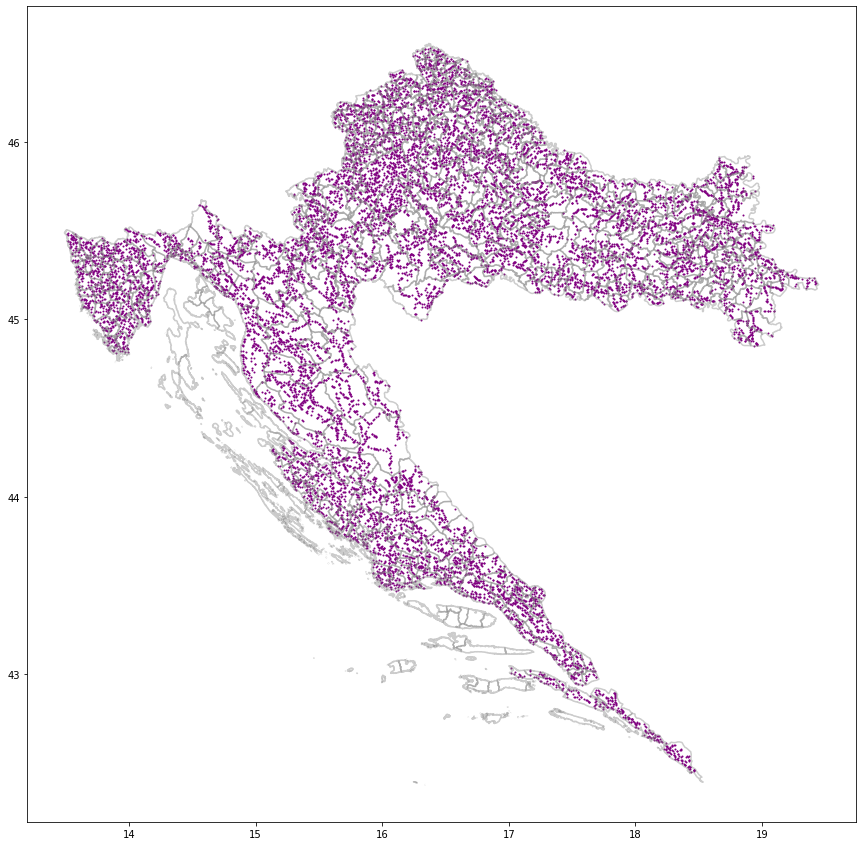

In [39]:
fig, ax = plt.subplots(figsize=(15, 15))
croatia_map.boundary.plot(ax=ax, alpha=0.4, color='grey')
geo_croatia.plot(ax=ax, markersize=1, color='purple')